In [39]:
import numpy as np
ang=np.array([0.15253511843098186,0.1255079976721513,0.10807048315498674,0.09497221757899951,0.07715505410475225,0.06912763757240625])
sig=np.array([0.019461359507793277,0.01703081042359836,0.01705287607527344,0.005361560486049449,0.005965762890487764,0.01514812942635182])
cang= 1.*ang + 0.011
csig= np.sqrt((ang*0.011)**2+(1.*sig)**2+(0.0035)**2)

print('calibrated angle',cang)
print('calibrated sigma',csig)


print(299792458./(2.*2.83e-10*np.sin(ang)))
print((299792458.*np.cos(ang)*sig)/(2.*2.83e-10*(np.sin(ang)**2)))
print('CALIBRATED')
print(299792458./(2.*2.83e-10*np.sin(cang)))
print((299792458.*np.cos(cang)*csig)/(2.*2.83e-10*(np.sin(cang)**2)))

calibrated angle [0.16353512 0.136508   0.11907048 0.10597222 0.08815505 0.08012764]
calibrated sigma [0.01984464 0.01744146 0.01744889 0.0064875  0.00696855 0.0155658 ]
[3.48593958e+18 4.23129843e+18 4.91069407e+18 5.58548331e+18
 6.87180556e+18 7.66828950e+18]
[4.41302657e+17 5.71148155e+17 7.71859151e+17 3.14374199e+17
 5.30285193e+17 1.67769590e+18]
CALIBRATED
[3.25334969e+18 3.89220601e+18 4.45889107e+18 5.00755141e+18
 6.01616457e+18 6.61739044e+18]
[3.91261478e+17 4.94209578e+17 6.50326268e+17 3.05408472e+17
 4.74337632e+17 1.28275861e+18]


Beta: [6.53967961e-34]
Beta Std Error: [1.29724574e-35]
Beta Covariance: [[5.22486269e-39]]
Residual Variance: 3.220843504680151e-32
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


<IPython.core.display.Javascript object>


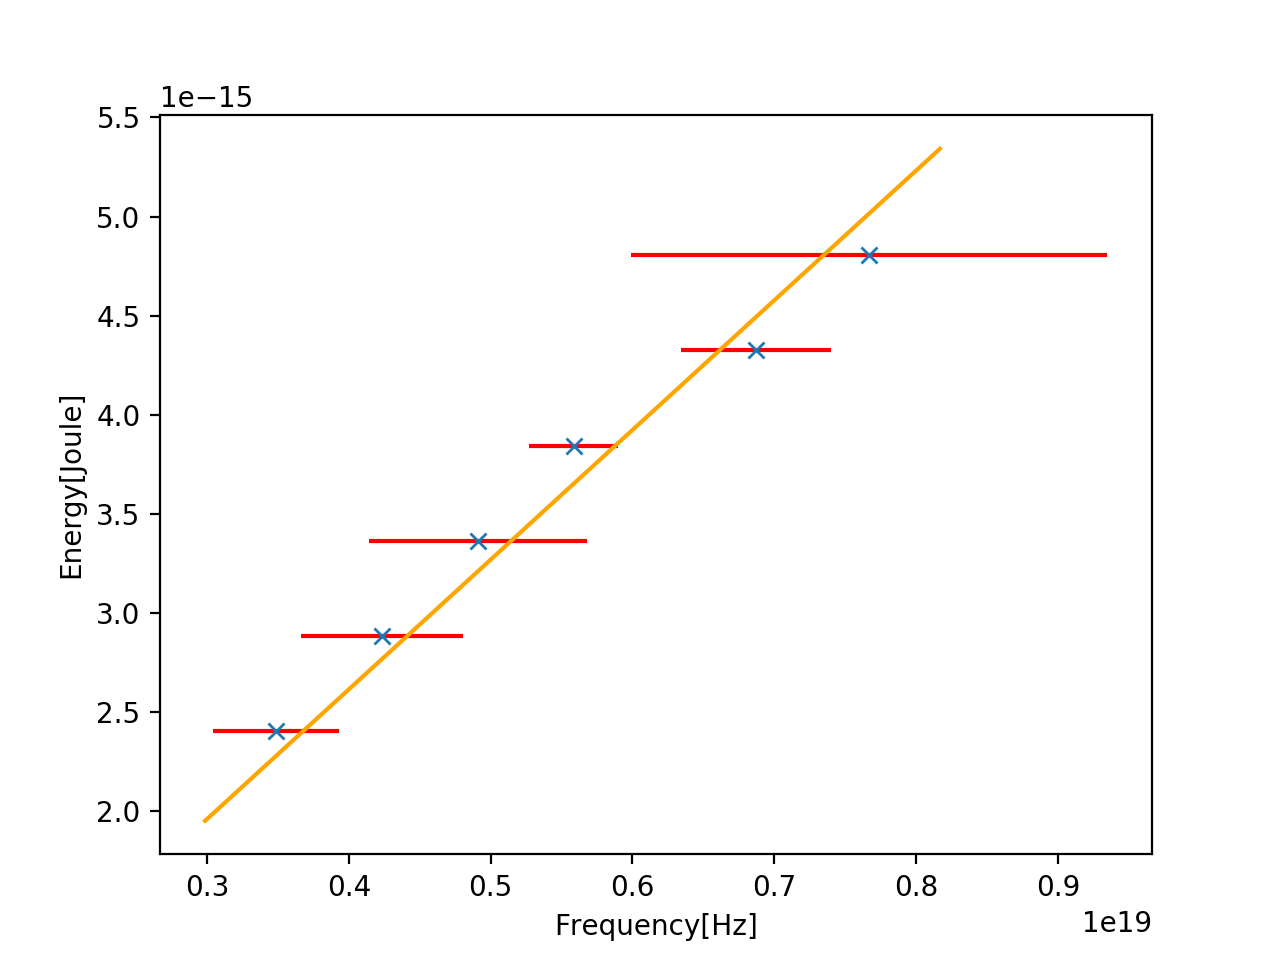

In [41]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import *
from scipy.stats import linregress
from scipy.optimize import fsolve
import random




frq=np.array([3.48593958e+18, 4.23129843e+18, 4.91069407e+18 ,5.58548331e+18,6.87180556e+18 ,7.66828950e+18])
sig=np.array([4.41302657e+17 ,5.71148155e+17 ,7.71859151e+17 ,3.14374199e+17, 5.30285193e+17 ,1.67769590e+18])
energy = 1.60217662e-16*np.array([15.,18.,21.,24.,27.,30.])



def fit_func(p, x):
    m= p
    return m*x

linear = Model(fit_func)

data = RealData(frq, energy, sx=sig)

odr= ODR(data, linear, beta0=[0.2])

out = odr.run()

out.pprint()

x_fit = np.linspace(frq[0]-0.5e+18, frq[-1]+0.5e+18, 1000)
y_fit = fit_func(out.beta, x_fit)

plt.errorbar(frq, energy, xerr=sig, linestyle='None', marker='x',ecolor='r')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Energy[Joule]')
plt.plot(x_fit, y_fit,color='orange')

